In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer,MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Binarizer, KBinsDiscretizer, StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE, RFECV

In [270]:
dfgender = pd.read_csv(r"C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\gender_submission.csv")
test = pd.read_csv(r"C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\test.csv")
train = pd.read_csv(r"C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\train.csv")

In [271]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [272]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [273]:
train = train.drop('Cabin', axis=1)
test = test.drop('Cabin', axis=1)

In [274]:
train.shape

(891, 11)

In [275]:
train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)
test['Fare'].fillna('50.00', inplace=True)


In [276]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [277]:
train['Age'].fillna(15,limit=59,inplace=True)
train['Age'].fillna(30,limit=59,inplace=True)
test['Age'].fillna(15,limit=59,inplace=True)
test['Age'].fillna(30,limit=59,inplace=True)

In [278]:
train.isna().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            59
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [279]:
train['Age'].fillna(45,inplace=True)
test['Age'].fillna(45,inplace=True)

In [280]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [281]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,15.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [282]:
train.to_csv(r'C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\train_modifie.csv', index = False)

In [283]:
y = train['Survived']
# X = train.drop(['Survived','Name','Ticket','PassengerId','SibSp','Parch','Embarked'], axis=1)

X = train.drop(['Survived','Name','Ticket','PassengerId'], axis=1)
test = test.drop(['Name','Ticket','PassengerId'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

X_train.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
887,1,female,19.0,0,0,30.0000,S
416,2,female,34.0,1,1,32.5000,S
479,3,female,2.0,0,1,12.2875,S
134,2,male,25.0,0,0,13.0000,S
588,3,male,22.0,0,0,8.0500,S


In [284]:
# encoder1 = OneHotEncoder()
# X_train['Embarked'] = encoder1.fit_transform(X_train[['Embarked']] )
# X_test['Embarked'] = encoder1.fit_transform(X_test[['Embarked']] )

In [285]:
#creation transformer
# Embarked = ['Embarked']
# sexe = ['Sex']

# Embarked_pipeline = make_pipeline(OneHotEncoder())
# sexe_pipeline = make_pipeline(LabelEncoder())

# X_train = np.array(X_train)

# print(X_train)



encoder = LabelEncoder()
X_train.iloc[:,1] = encoder.fit_transform(X_train.iloc[:,1])
X_test.iloc[:,1] = encoder.fit_transform(X_test.iloc[:,1])
test.iloc[:,1] = encoder.fit_transform(test.iloc[:,1])

X_train.iloc[:,6] = encoder.fit_transform(X_train.iloc[:,6])
X_test.iloc[:,6] = encoder.fit_transform(X_test.iloc[:,6])
test.iloc[:,6] = encoder.fit_transform(test.iloc[:,6])

# test = test.drop(['Fare'], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [286]:
X_scaled = scale(X_train)


In [287]:
selector = RFECV(LogisticRegression(solver='lbfgs', multi_class='auto', random_state=5, max_iter=5000),step=1,min_features_to_select=2,cv=5)#step= nb de variables eleminées par tour de boucle, 
# min_features_to_select= cooix du nb de variable min restantes
# cv= nb de split pour la cross validation
selector.fit_transform(X_train,y_train)

array([[ 1.,  0., 19.,  0.,  0.,  2.],
       [ 2.,  0., 34.,  1.,  1.,  2.],
       [ 3.,  0.,  2.,  0.,  1.,  2.],
       ...,
       [ 1.,  1., 35.,  0.,  0.,  2.],
       [ 3.,  1., 32.,  1.,  0.,  2.],
       [ 1.,  1., 31.,  0.,  0.,  2.]])

In [288]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
126,3,1,15.0,0,0,7.7500,1
354,3,1,30.0,0,0,7.2250,0
590,3,1,35.0,0,0,7.1250,2
509,3,1,26.0,0,0,56.4958,2
769,3,1,32.0,0,0,8.3625,2


In [289]:
selector.get_support()


array([ True,  True,  True,  True,  True, False,  True])

In [290]:
selector.ranking_#classement des coefs 

array([1, 1, 1, 1, 1, 2, 1])

In [291]:
predictions = selector.predict(X_test)

In [292]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
126,3,1,15.0,0,0,7.7500,1
354,3,1,30.0,0,0,7.2250,0
590,3,1,35.0,0,0,7.1250,2
509,3,1,26.0,0,0,56.4958,2
769,3,1,32.0,0,0,8.3625,2


In [293]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [294]:
selector.score(X_test,y_test)

0.8268156424581006

In [295]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [296]:
prediction_test = selector.predict(test)

In [310]:
predictions = pd.DataFrame(prediction_test, columns=['Survived'])

test = test.merge(predictions)

test.to_csv("resultats.csv",index=False)


In [303]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,0
1,3,0,47.0,1,0,7,2,0
2,2,1,62.0,0,0,9.6875,1,0
3,3,1,27.0,0,0,8.6625,2,0
4,3,0,22.0,1,1,12.2875,2,1


## Évaluation du modèle

In [177]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(modele_logit.coef_)

0.8268156424581006
[[99 12]
 [19 49]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       111
           1       0.80      0.72      0.76        68

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



NameError: name 'modele_logit' is not defined

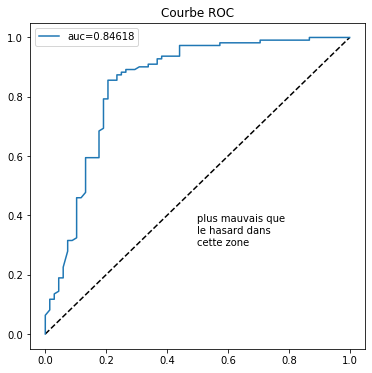

In [180]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
proba = selector.predict_proba(X_test)

fpr0, tpr0, thresholds0 = roc_curve(y_test, proba[:, 0], pos_label=model.classes_[0], drop_intermediate=False)
thresholds0.shape

tp = pd.DataFrame(dict(fpr=fpr0, tpr=tpr0, threshold=thresholds0))
#tp.head()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2



fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
aucf = auc(fpr0, tpr0)
ax.plot(fpr0, tpr0, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

# Algo de classification + pipeline

In [70]:
titanic = pd.read_csv(r"C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\train.csv")

y = titanic['Survived']
X = titanic.drop(['Survived'], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [72]:
# creation pipeline
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude= np.number)

numerical_pipeline = make_pipeline(SimpleImputer(),StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())


In [73]:
#creation make coliumn transformer
processor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline,categorical_features))

In [74]:
model = make_pipeline(processor,SGDClassifier())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

In [75]:
model.score(X_test,y_test)

ValueError: Found unknown categories ['Widener, Mr. Harry Elkins', 'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)', 'Wiklund, Mr. Jakob Alfred', 'Newell, Miss. Madeleine', 'Madigan, Miss. Margaret "Maggie"', 'Leader, Dr. Alice (Farnham)', 'Graham, Miss. Margaret Edith', 'Jensen, Mr. Svend Lauritz', 'Olsson, Mr. Nils Johan Goransson', 'Larsson, Mr. Bengt Edvin', 'Beckwith, Mrs. Richard Leonard (Sallie Monypeny)', 'Sawyer, Mr. Frederick Charles', 'Oreskovic, Mr. Luka', 'Ringhini, Mr. Sante', 'Panula, Master. Eino Viljami', 'Fortune, Miss. Alice Elizabeth', 'Astor, Mrs. John Jacob (Madeleine Talmadge Force)', 'Lam, Mr. Len', 'Lievens, Mr. Rene Aime', 'Sivic, Mr. Husein', 'Connolly, Miss. Kate', 'Shellard, Mr. Frederick William', 'Skoog, Mrs. William (Anna Bernhardina Karlsson)', 'Murphy, Miss. Margaret Jane', 'Goodwin, Mr. Charles Edward', 'Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)', 'Rice, Master. George Hugh', 'McGovern, Miss. Mary', 'Drazenoic, Mr. Jozef', 'Bengtsson, Mr. John Viktor', 'Francatelli, Miss. Laura Mabel', 'Rintamaki, Mr. Matti', 'Dantcheff, Mr. Ristiu', 'Shelley, Mrs. William (Imanita Parrish Hall)', 'Calic, Mr. Petar', 'Baxter, Mr. Quigg Edmond', 'Boulos, Mr. Hanna', 'Dean, Master. Bertram Vere', 'Futrelle, Mr. Jacques Heath', 'Salkjelsvik, Miss. Anna Kristine', 'Abbott, Mrs. Stanton (Rosa Hunt)', 'O\'Leary, Miss. Hanora "Norah"', 'Brewe, Dr. Arthur Jackson', 'Laroche, Miss. Simonne Marie Anne Andree', 'Petroff, Mr. Nedelio', 'Strom, Mrs. Wilhelm (Elna Matilda Persson)', 'Becker, Miss. Marion Louise', 'Cavendish, Mr. Tyrell William', 'Jonkoff, Mr. Lalio', 'Sobey, Mr. Samuel James Hayden', 'van Melkebeke, Mr. Philemon', 'Hoyt, Mr. William Fisher', 'Carter, Miss. Lucile Polk', 'Smith, Mr. Richard William', 'Asim, Mr. Adola', 'Allison, Miss. Helen Loraine', 'Reynaldo, Ms. Encarnacion', 'Frolicher, Miss. Hedwig Margaritha', 'Connaghton, Mr. Michael', 'Ward, Miss. Anna', 'Clarke, Mrs. Charles V (Ada Maria Winfield)', 'Stead, Mr. William Thomas', 'Frolicher-Stehli, Mr. Maxmillian', 'McCormack, Mr. Thomas Joseph', 'Williams, Mr. Leslie', 'McMahon, Mr. Martin', 'Ivanoff, Mr. Kanio', 'Hickman, Mr. Lewis', 'Caldwell, Master. Alden Gates', 'Rosblom, Mrs. Viktor (Helena Wilhelmina)', 'Alexander, Mr. William', 'Quick, Mrs. Frederick Charles (Jane Richards)', 'Lefebre, Master. Henry Forbes', 'Fortune, Miss. Mabel Helen', 'Asplund, Miss. Lillian Gertrud', 'Nysveen, Mr. Johan Hansen', 'Taussig, Mrs. Emil (Tillie Mandelbaum)', 'Norman, Mr. Robert Douglas', 'Windelov, Mr. Einar', 'Turpin, Mr. William John Robert', 'Holm, Mr. John Fredrik Alexander', 'Corn, Mr. Harry', 'Hippach, Mrs. Louis Albert (Ida Sophia Fischer)', 'Bonnell, Miss. Elizabeth', 'Walker, Mr. William Anderson', 'Plotcharsky, Mr. Vasil', 'Holverson, Mrs. Alexander Oskar (Mary Aline Towner)', 'Shutes, Miss. Elizabeth W', 'Thorneycroft, Mrs. Percival (Florence Kate White)', 'van Billiard, Mr. Austin Blyler', 'Meek, Mrs. Thomas (Annie Louise Rowley)', 'Boulos, Miss. Nourelain', 'Mionoff, Mr. Stoytcho', 'Vande Velde, Mr. Johannes Joseph', 'Lundahl, Mr. Johan Svensson', 'Barton, Mr. David John', 'Panula, Mr. Ernesti Arvid', 'Novel, Mr. Mansouer', 'Elias, Mr. Joseph Jr', 'Lulic, Mr. Nikola', 'Bourke, Mr. John', 'Ryan, Mr. Patrick', 'Johnson, Mr. Alfred', "O'Connor, Mr. Maurice", 'Baumann, Mr. John D', 'Bishop, Mrs. Dickinson H (Helen Walton)', 'Silven, Miss. Lyyli Karoliina', 'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")', 'Moen, Mr. Sigurd Hansen', 'Mellors, Mr. William John', 'Mineff, Mr. Ivan', 'Waelens, Mr. Achille', 'Otter, Mr. Richard', 'Lahoud, Mr. Sarkis', 'Drew, Mrs. James Vivian (Lulu Thorne Christian)', 'Todoroff, Mr. Lalio', 'Hegarty, Miss. Hanora "Nora"', 'Blackwell, Mr. Stephen Weart', 'Harper, Rev. John', 'Barkworth, Mr. Algernon Henry Wilson', 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)', 'Kantor, Mr. Sinai', 'Collyer, Mrs. Harvey (Charlotte Annie Tate)', 'Wheadon, Mr. Edward H', 'Stephenson, Mrs. Walter Bertram (Martha Eustis)', 'Ryerson, Miss. Emily Borie', 'Foo, Mr. Choong', 'Attalah, Miss. Malake', 'Fox, Mr. Stanley Hubert', 'Slemen, Mr. Richard James', 'Van Impe, Miss. Catharina', 'Meanwell, Miss. (Marion Ogden)', 'Chambers, Mr. Norman Campbell', 'Gustafsson, Mr. Karl Gideon', 'Burns, Miss. Elizabeth Margaret', 'Barber, Miss. Ellen "Nellie"', 'Moor, Mrs. (Beila)', 'Skoog, Mr. Wilhelm', 'Saalfeld, Mr. Adolphe', 'Pears, Mrs. Thomas (Edith Wearne)', 'Hale, Mr. Reginald', 'Artagaveytia, Mr. Ramon', 'Renouf, Mr. Peter Henry', 'Salonen, Mr. Johan Werner', 'Parkes, Mr. Francis "Frank"', 'Vanden Steen, Mr. Leo Peter', 'Newell, Miss. Marjorie', 'Somerton, Mr. Francis William', 'Lobb, Mrs. William Arthur (Cordelia K Stanlick)', 'Ford, Miss. Doolina Margaret "Daisy"', "O'Connell, Mr. Patrick D", 'Kenyon, Mrs. Frederick R (Marion)', 'Touma, Mrs. Darwis (Hanne Youssef Razi)', 'Morley, Mr. William', 'Bidois, Miss. Rosalie', 'Kelly, Mrs. Florence "Fannie"', 'Skoog, Miss. Margit Elizabeth', 'Hamalainen, Master. Viljo', 'Markoff, Mr. Marin', 'Sunderland, Mr. Victor Francis', 'Petranec, Miss. Matilda', 'Jacobsohn, Mrs. Sidney Samuel (Amy Frances Christy)', 'Ling, Mr. Lee', 'Cameron, Miss. Clear Annie', 'Navratil, Master. Edmond Roger', 'Gustafsson, Mr. Johan Birger', 'Collyer, Miss. Marjorie "Lottie"', 'Harris, Mr. George', 'White, Mr. Percival Wayland', 'Thorneycroft, Mr. Percival', 'Sharp, Mr. Percival James R', 'Lefebre, Miss. Jeannie', 'Beane, Mr. Edward', 'Glynn, Miss. Mary Agatha', 'West, Miss. Constance Mirium', 'O\'Dwyer, Miss. Ellen "Nellie"', 'Sage, Miss. Dorothy Edith "Dolly"', 'Harris, Mr. Henry Birkhardt', 'Doharr, Mr. Tannous'] in column 0 during transform

In [91]:


titanic = pd.read_csv(r"C:\Users\utilisateur\Documents\Mlearning\Brief_Projet_Titanic\titanic\train.csv")

y = titanic['Survived']
X = titanic.drop(['Survived'], axis=1)








In [95]:
X = titanic.drop(['Survived','Name','Ticket','PassengerId','Cabin'], axis=1)
X.head()
X.iloc[:,1]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [94]:
encoder = LabelEncoder()
X.iloc[:,1] = encoder.fit_transform(X.iloc[:,1])
X.iloc[:,6] = encoder.fit_transform(X.iloc[:,6])

X.head()

TypeError: argument must be a string or number

In [ ]:
selector = RFECV(SGDClassifier(),step=1,min_features_to_select=2,cv=5)#step= nb de variables eleminées par tour de boucle, 
# min_features_to_select= cooix du nb de variable min restantes
# cv= nb de split pour la cross validation
selector.fit_transform(X,y)